# Visualizing Earnings Based On College Majors 

This is a guided project in my course at [Dataquest.io](dataquest.io), which intends to show my ability to visualise data with histograms, scatter plots, bar plots, with the libraries pandas, matplotlib and numpy.

Feel free to discuss this with me!



In this occassion I will work with the dataset `'recent-grads.csv'` on the job outcomes of students who graduated from college between 2010 and 2012 in the USA. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors) cleaned the dataset and released it on their Github repo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')

In [4]:
recent_grads.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [6]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [7]:
recent_grads.tail(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [8]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Let's count the number of rows in the dataframe `recent_grads` with [`shape`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html):

In [9]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

Let's drop the rows that contain missing values with [`dropna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html). By using `inplace = True` this will actually change the dataframe to one with NA entries dropped from it.

In [10]:
recent_grads.dropna(inplace=True)

In [11]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

So now we have 172 rows (only one row had empty cells).

In [12]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Now let's make some exploratory plots with the method `DataFrame.plot()`.

Remember that each row represents a different major in college.

`Median` is the median salary of full-time, year-round workers

`Full_time` is the number of full time employed (35 hours or more per week)

`Sample_size` sample size (unweighted) of full-time for a major

`ShareWomen` is women as share of total



Rank - Rank by median earnings (the dataset is ordered by this column).

Major_code - Major code.

Major - Major description.

Major_category - Category of major.

Total - Total number of people with major.

Sample_size - Sample size (unweighted) of full-time.

Men - Male graduates.

Women - Female graduates.

ShareWomen - Women as share of total.

Employed - Number employed.

Median - Median salary of full-time, year-round workers.

Low_wage_jobs - Number in low-wage service jobs.

Full_time - Number employed 35 hours or more.

Part_time - Number employed less than 35 hours.


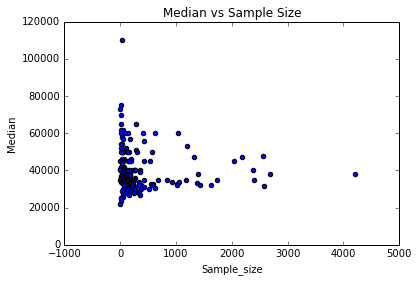

In [14]:
recent_grads.plot(x = 'Sample_size', y = 'Median', 
                  kind = 'scatter', title = 'Median vs Sample Size')


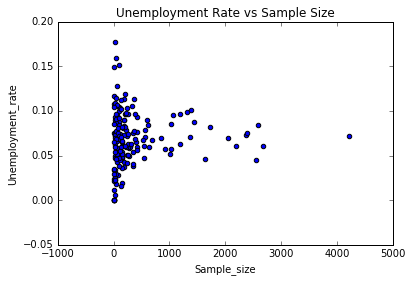

In [15]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', 
                  kind = 'scatter',
                  title = 'Unemployment Rate vs Sample Size')

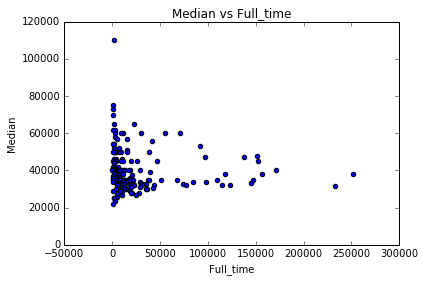

In [16]:
recent_grads.plot(x = 'Full_time', y = 'Median', 
                  kind = 'scatter', 
                  title = 'Median vs Full_time')

Does this show a relationship between the median salaries and the number of full-time employees?

I'm not sure. It seems like most majors have a low-end number of full time employees with a bottom-end mean salary.



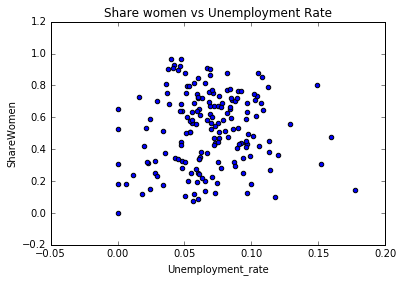

In [18]:
recent_grads.plot(x = 'Unemployment_rate', y = 'ShareWomen', 
                  kind = 'scatter', 
                  title = 'Share women vs Unemployment Rate')

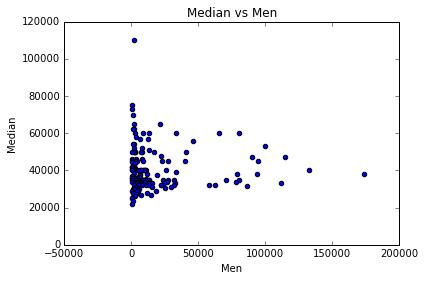

In [19]:
recent_grads.plot(x = 'Men', y = 'Median', 
                  kind = 'scatter', 
                  title = 'Median vs Men')

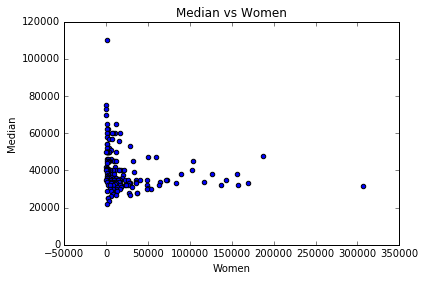

In [20]:
recent_grads.plot(x = 'Women', y = 'Median', 
                  kind = 'scatter', 
                  title = 'Median vs Women')

Let's explore the relation between the number of graduates in a major and their salary:

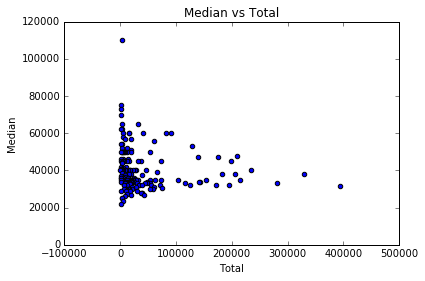

In [23]:
recent_grads.plot(x = 'Total', y = 'Median', 
                  kind = 'scatter', 
                  title = 'Median vs Total')

We can see that the major that has the highest salary has a few graduates.


Lower salaries are distributed across majors with small and large amounts of graduates.

Let's select the majors with a majority of women in it (that is, 50% or more are women, i.e. `ShareWomen`>0.5).


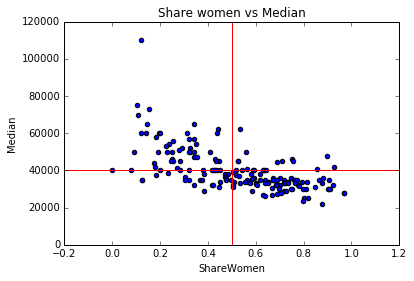

In [17]:
ax = recent_grads.plot(y = 'Median', 
                       x = 'ShareWomen', 
                      kind = 'scatter', 
                      title = 'Share women vs Median')

plt.axvline(x=0.5, color='r', linestyle='-')
plt.axhline(y = recent_grads['Median'].mean(), 
            color = 'r', linestyle = '-')

It seems like students that majored in subjects that were majority female do not earn more than the majors where the majority of students are men. Majority women means that more than 50% graduates are women.

The red horizontal line marks the mean of the median salaries for full-time working graduates.

The red vertical line marks 0.5 of the column ShareWomen, which is the division between the zone where majority are men and those majors where majority are men.

## Histogram visuals



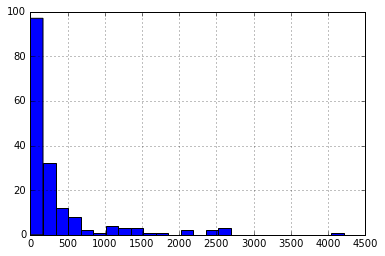

In [51]:
recent_grads['Sample_size'].hist(bins = 25)

36000.0

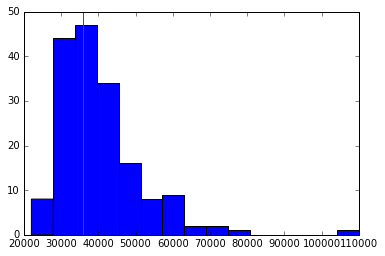

In [79]:
(n, bins, patches) =plt.hist( x = recent_grads['Median'], bins = 15)
plt.axvline(x=recent_grads['Median'].median(), color='r', linestyle='-')
recent_grads['Median'].median()


The most common median salary is in the range (39600 , 45466.67) since there are  47 values in this range.

The mean salary of the medians is 36,000

In [19]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb411076550>,
      dtype=object)

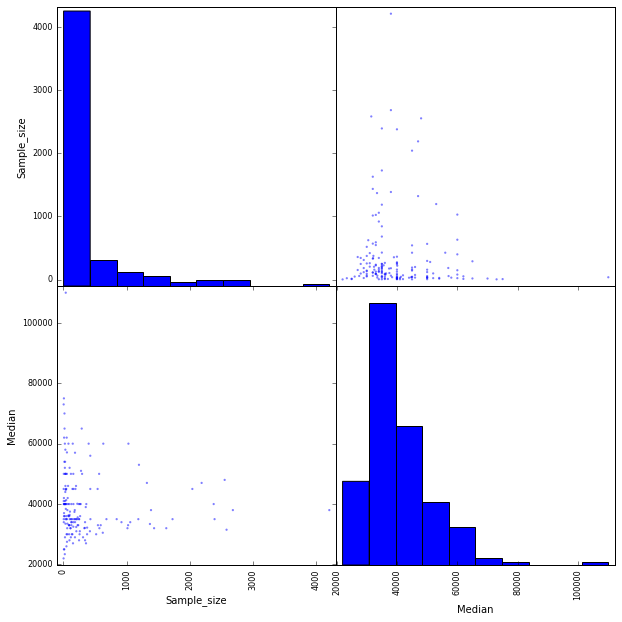

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb410e242e8>,
      dtype=object)

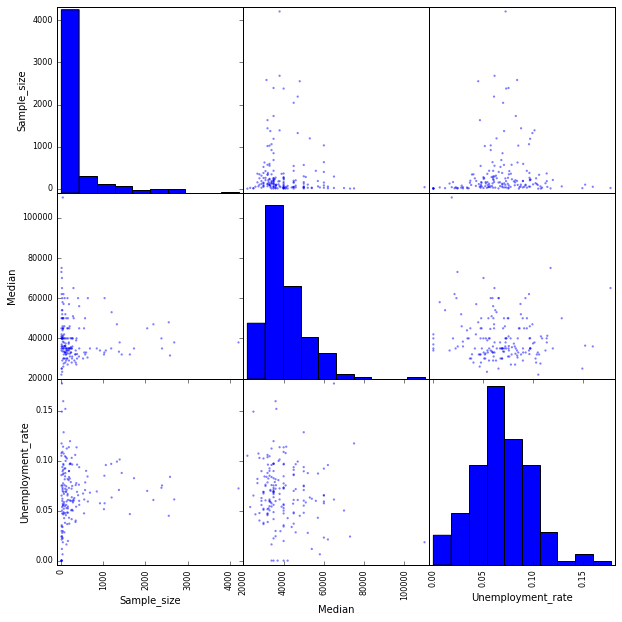

In [21]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
               figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb410f7d438>,
      dtype=object)

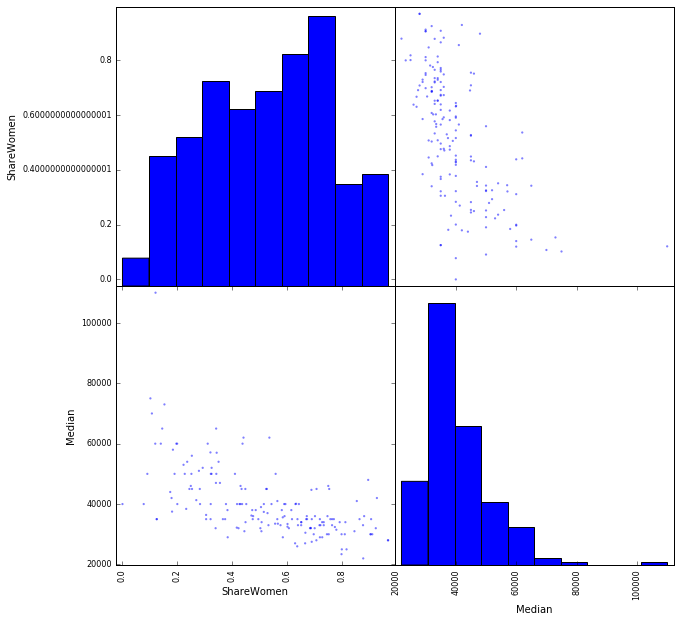

In [22]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize = (10,10))


## Bar plots

These two ways of making bar plots are slightly different in terms of labels.

See the following two examples:

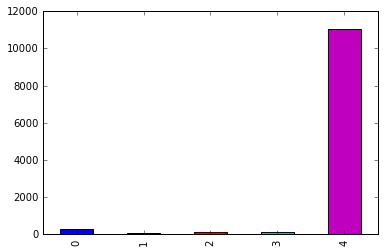

In [23]:
recent_grads[:5]['Women'].plot(kind='bar')

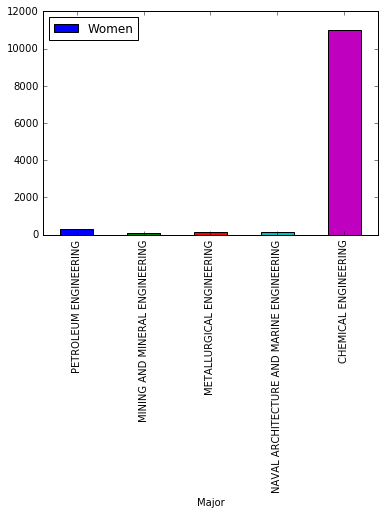

In [24]:
recent_grads[:5].plot.bar(x='Major', y='Women')

In the first case `recent_grads[:5]['Women'].plot(kind='bar')`, we are using [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = bar`. Here the labels on the x-axis will be `0` to `n`.

In the second case, `recent_grads[:5].plot.bar(x='Major', y='Women')`, we are using [pandas.DataFrame.plot.bar](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html). Here, we specify the labels with the parameter `x` and the data for the bars with par `y`.

For the plots below I will use `plot.barh` because the labels will be seen better.

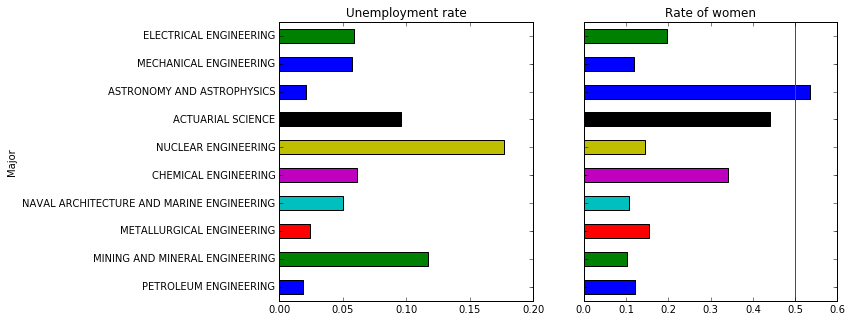

In [69]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5), sharey=True)

ax1 = recent_grads[:10].plot.barh(x='Major',
                            y='Unemployment_rate', 
                            ax = ax1,
                            legend = False)

ax1.set_title("Unemployment rate")
#ax1.set_xticks(np.arange(0, 0.2, step=0.05))
ax1.set_xlim(0,0.2)


ax2 = recent_grads[:10].plot.barh(x='Major',
                            y='ShareWomen', ax = ax2,
                            legend = False
                           )
ax2.set_title("Rate of women")
ax2.set_ylabel('')
ax2.axvline(x=0.5, color='r', linestyle='-')